# Question 2

Write Python code to build a neural network with the following details. 

    - Input data = Iris dataset
    - Number of hidden layers = 1
    - Number of units in hidden layer = 10
    - Number of iterations = 5000 
    - Learning algorithm = stochastic gradient descent
    - Activation = logistic
    - Learning rate =  0.0001, 0.001, 0.01, 0.1, 1


1. Compare the training score for each learning rate. 
2. Plot the loss curve for each  learning rate. 
3. Report execution time for each learning rate as a bar graph. (Use library time and time() method) 


## Expectations

1. Expected output: (approximately)
    - Training accuracy 0.0001 is xx.xxx
    - Training accuracy 0.001 is xx.xxx
    - Training accuracy 0.01 is xx.xxx
    - Training accuracy 0.1 is xx.xxx
    - Training accuracy 1 is xx.xxx 
    
2. Graph: Training Loss (Actual output may vary)
![title](images/op-learning.png)

3. Bar graph: Execution Time (Actual output may vary)
![title](images/time-learning.png)

You are expected to modify this notebook and upload the modified file as assignment submission.

<b> PS: Code written within the block will be evaluted. Other code will be ignored.
#### start code here
#### end code here

In [1]:
from sklearn import datasets  
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Iris dataset.

iris = datasets.load_iris()

# Extract all columns except last from the dataset for X values.
# y is the target column.

X = iris["data"][:,:-1]  
y = iris["target"]

# Split data into train and test

(X_train, X_test, y_train, y_test) = train_test_split(X, y, stratify=y, test_size= 0.3)

# normalise the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
# Use the library function sklearn.neural_network.MLPClassifier 
from sklearn.neural_network import MLPClassifier
import time
# Build neural network for each learning rate. (max 10 lines of code) Use loop.
# start code here
 
# Declaration and initialization of few variables 

alphas = [0.0001,0.001,0.01,0.1,1]        # store the given learning rate
mydict = {}                               # will be used to store the accuracy value against each learning rate
mlps = []                                 # will be used in plotting the graph
executiontime = {}                        # will be used to store the execution time agaist each learning rate

for alpha in alphas:
    
    # Below line is for part 3 question to get the execution time 
    start_time = time.time()
    
    # Build the Neural Network as per given problem
    mlp = MLPClassifier(hidden_layer_sizes=(10),activation='logistic',solver='sgd',learning_rate_init=alpha,max_iter=5000)
    mlp.fit(X_train, y_train)
    
    # After completion store the execution time against learning rate
    executiontime[alpha] = (time.time() - start_time) 
    
    # Store the model values in dictonary to render the graph in given question no 2
    mlps.append(mlp)
    
    # get the prediction values using model 
    predictions = mlp.predict(X_test)
    
    #Store the accuracy against each learning rate for problem NO 1
    mydict[alpha]= accuracy_score(y_test, predictions)
    
    # Core Logic of Assignment End 
# end code here

In [ ]:
# Compare the training  score for each learning rate. (max 2 lines of code) Use loop. 

# start code here
for x in mydict:
    val = mydict[x]
    print ('Training accuracy '+ str(x) +'    is',val)   
# end code here

In [ ]:
# Plot the loss curve for each learning rate. (max 5 lines of code) Use loop.

# start code here

labels = ["0.0001","0.001", "0.01","0.1", "1"]        
plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'Yellow', 'linestyle': '-'}, 
             {'c': 'black', 'linestyle': '-'}]
for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.loss_curve_, label=label, **args)
plt.legend()
plt.show()
plt.close('all')
# end code here

0.0001 0.004850864410400391
0.001 0.9447650909423828
0.01 0.5804901123046875
0.1 0.13973593711853027
1 0.03126025199890137


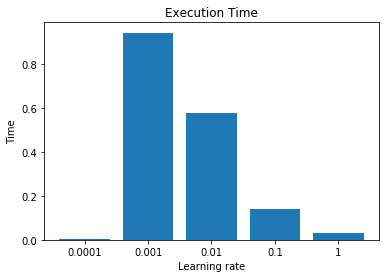

In [63]:
# Plot the execution time as bar graph. (max 5 lines of code)

# start code here
for x in executiontime:
    print(x, executiontime[x])
plt.bar(range(len(executiontime)), list(executiontime.values()), align='center')
plt.xticks(range(len(executiontime)), list(executiontime.keys()))
plt.ylabel('Time')
plt.xlabel('Learning rate')
plt.title('Execution Time')
plt.show()
plt.close('all')

# end code here